In [3]:
import sys
sys.path.insert(0, '../../utils/')

In [4]:
import torch
import numpy as np
import pandas as pd

In [5]:
from top_genes import mean_of_attention_heads
from attn_graph import build_attn_graph, plot_graph, build_and_plot_attn_graph

In [6]:
from graph_tool.all import *

In [7]:
LATENT_DIM = 50
ATTN_HEADS = 10

In [8]:
cellvgae_node_embs = np.load('Darmanis/CellVGAE/cellvgae_node_embs.npy')
cellvgae_umap = np.load('Darmanis/CellVGAE/cellvgae_umap.npy')
cellvgae_clusters = np.load('Darmanis/CellVGAE/cellvgae_clusters.npy')

In [9]:
layer_1_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_1_attention_edge_index.pt')
layer_1_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_1_attention_coeff.pt')

In [10]:
layer_2_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_2_attention_edge_index.pt')
layer_2_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_2_attention_coeff.pt')

In [11]:
layer_mean_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_mean_attention_edge_index.pt')
layer_mean_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_mean_attention_coeff.pt')

In [12]:
layer_std_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_std_attention_edge_index.pt')
layer_std_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_std_attention_coeff.pt')

In [13]:
darmanis_df = pd.read_csv('Darmanis/darmanis_ground_truth_clusters.csv')

In [14]:
cell_types = darmanis_df['Cluster'].values.tolist()

### Shorten names

In [15]:
cell_types = [x if x != 'endothelial' else 'End' for x in cell_types]
cell_types = [x if x != 'astrocytes' else 'Ast' for x in cell_types]
cell_types = [x if x != 'neurons' else 'N' for x in cell_types]
cell_types = [x if x != 'oligodendrocytes' else 'Oli' for x in cell_types]
cell_types = [x if x != 'fetal_quiescent' else 'FQ' for x in cell_types]
cell_types = [x if x != 'fetal_replicating' else 'FR' for x in cell_types]
cell_types = [x if x != 'microglia' else 'Mcr' for x in cell_types]

In [16]:
num_cells = len(cell_types)

../../utils/attn_graph.py:32: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729002806/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  zero_degrees_indices = (degrees == 0).nonzero()


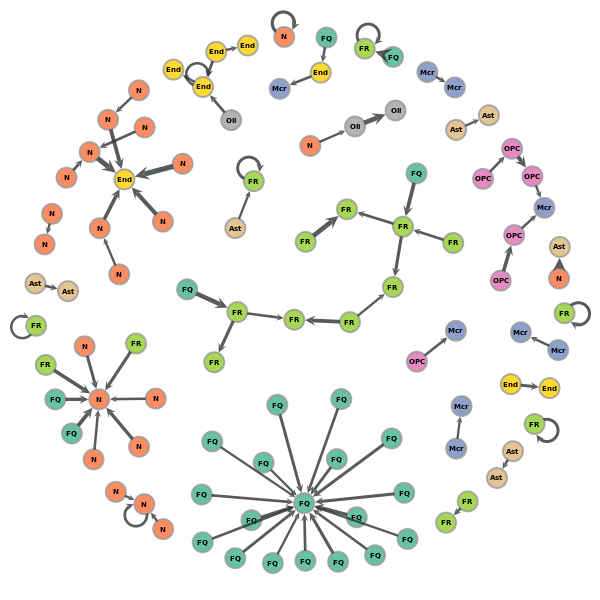

In [17]:
build_and_plot_attn_graph(layer_2_attn_edge_index, layer_2_attn_coeff, cell_types, 'layer_2', None, edge_scale_factor=8, k=80)